# Regression

You will be using the Diabetes dataset from sklearn for all your Regression tasks

Get the dataset using the following command:

In [1]:
from sklearn.datasets import load_diabetes
diabetes_df =  load_diabetes(as_frame=True).frame
diabetes_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


Your objectives are available in the README.md file accompanying this notebook:

I will be providing a jupyter file with headers for where you can insert your answers for each question

Below we will be going over the following to help you with the Lab:
- How to create a ***correlation matrix***
- How to select the best k features using ***pearsons correlation***
  - How to show which features were selected with pearsons correlation
- How to do ***forward selection***
  - How to show which features were selected with forward selection
- How to do ***backward elimination***
  - Showing how features are selected is the same as withforward selection 
- How to do ***recursive feature Elimination***
  - How to show which features were selected
  - How to show ranking of features
- How to do ***cross validation*** with ***ShuffleSplit***
- How to use ***RidgeCV*** to find the best regularization ***parameter/alpha***
  - How to grab the best alpha from RidgeCV
- How to use ***Regularized Linear Regression/Ridge Regression***
- How to plot a ***learning curve***
- How to do ***LassoCV Regression*** 
  - How to grab features that have been selected
- How to do regular ***LassoRegression*** 

***Note:*** I will not be going over the LinearRegression class as it is covered in the previous Lab <br>
***Note*** I will not be going over rsquared and mse as thety are covered in the previous lab

## Below is our sample data for our demonstration.

In [2]:
import numpy as np
import pandas as pd

X = np.array([[1, 1, 4, 8], [1, 2, 3, 4], [2, 2, 9, 9], [2, 3, 4, 4], [2, 0, 3, 4], [2, 6, 7, 4], [1, 3, 6, 4]])
# y = 1 * x_1 + 2 * x_2 + 3
y = np.dot(X, np.array([1, 2, 7, 7])) + 3
X_y_df = pd.DataFrame(np.array(np.transpose([X[:,0], X[:,1], X[:,2], X[:,3], y])), columns=["x1", "x2", "x3", "x4", "y"])
X_y_df

,x1,x2,x3,x4,y
0,1,1,4,8,90
1,1,2,3,4,57
2,2,2,9,9,135
3,2,3,4,4,67
4,2,0,3,4,54
5,2,6,7,4,94
6,1,3,6,4,80


## How to create a correlation matrix

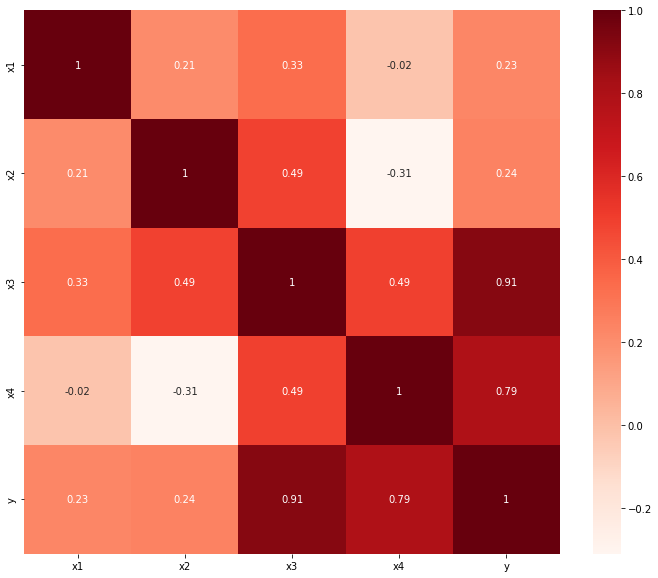

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt 

plt.figure(figsize=(12,10))
cor = X_y_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

## How to select the best k features using pearsons correlation
Use sklearns r_regression, which looks at the correlation between the predictors and the target and selects the most positive and negative correlations

You must fit the selector on the training set and transform the training and testing sets with your selector

In [4]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import r_regression
k_in = 2

training_set_x = X[:5]
training_set_y = y[:5]

testing_set_x = X[5:]
testing_set_y = y[5:]

selector = SelectKBest(r_regression, k=k_in).fit(training_set_x, training_set_y)
training_set_new = selector.transform(training_set_x)
testing_set_new = selector.transform(testing_set_x)

This is the new training set after selection (as you can see it has removed a feature)

In [5]:
pd.DataFrame(training_set_new)

,0,1
0,4,8
1,3,4
2,9,9
3,4,4
4,3,4


This is the new testing set after selection (as you can see it has removed a feature)

In [6]:
pd.DataFrame(testing_set_new)

,0,1
0,7,4
1,6,4


### How to show which features were selected

In [7]:
import numpy as np

selector.scores_
top_n = np.argsort(selector.scores_)[-k_in:]
print(X_y_df.iloc[:, top_n].columns)

Index(['x4', 'x3'], dtype='object')


## How to do forward selection with tol of 0.01 for mean squared error

Note: SequentialFeatureSelector also allows setting the number of features you want, however for this lab we will be using the "auto" method with the criteria of "To add in a feature, it must reduce our mse by 0.01"

You must fit the selector on the training set and transform the training and testing sets with your selector

In [8]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
sfs = SequentialFeatureSelector(reg, n_features_to_select="auto", scoring='neg_mean_squared_error', tol=0.01, direction='forward')
sfs.fit(training_set_x, training_set_y)
training_set_x_new = sfs.transform(training_set_x)
testing_set_x_new = sfs.transform(testing_set_x)

**n_features_to_select**: This is the number of features you want to select<br>
**scoring**: refers to the metric we want to use for our tolerance criteria. Here we are using mean squared error<br>
**direction**: this denotes whether we are doing forward or backward selection<br>

### How to show which features were selected

In [9]:
fs_indices = sfs.get_support(True)
print(X_y_df.iloc[:, fs_indices].columns)

Index(['x2', 'x3', 'x4'], dtype='object')


## How to do backward selection with tol of 0.01 for mean squared error

Same thing as forward just set direction to backward

In [10]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
sfs = SequentialFeatureSelector(reg, n_features_to_select="auto", scoring='neg_mean_squared_error', tol=0.01, direction='backward')
sfs.fit(training_set_x, training_set_y)
training_set_x_new = sfs.transform(training_set_x)
testing_set_x_new = sfs.transform(testing_set_x)

**n_features_to_select**: This is the number of features you want to select
**scoring**: refers to the metric we want to use for our tolerance criteria. Here we are using mean squared error<br>
**direction**: this denotes whether we are doing forward or backward selection<br>

### How to show which features were selected

In [11]:
fs_indices = sfs.get_support(True)
print(X_y_df.iloc[:, fs_indices].columns)

Index(['x2', 'x3', 'x4'], dtype='object')


## How to do recursive feature elimination

It follows almost the same convention as the others. 

In [12]:
from sklearn.feature_selection import RFE

estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=3, step=1)
selector.fit(training_set_x, training_set_y)

training_set_x_new = selector.transform(training_set_x)
testing_set_x_new = selector.transform(testing_set_x)

**n_features_to_select**: This is the number of features you want to select<br>
**step**:  step corresponds to the (integer) number of features to remove at each iteration. (Just leave at 1 for this Lab)

### How to show which features were selected

In [13]:
fs_indices = selector.get_support(True)
print(X_y_df.iloc[:, fs_indices].columns)

Index(['x2', 'x3', 'x4'], dtype='object')


### How to show ranking of features

In [14]:
import pandas as pd

ranking_indices = selector.ranking_
pd.DataFrame(list(zip(X_y_df.columns,ranking_indices)), columns=["features","rank"])

,features,rank
0,x1,2
1,x2,1
2,x3,1
3,x4,1


As you might have noticed, all the selected features have ranking of 1

## How to do cross validation with ShuffleSplit

We split the data into 4 training sets and 4 testing sets.<br>
The indices for the samples used for each dataset are printed below.<br>
In your objectives, you are asked to get the mse and rsquared for every testing set.<br>

In [15]:
from pprint import pprint
from sklearn.model_selection import ShuffleSplit
rs = ShuffleSplit(n_splits=4, test_size=.25, random_state=0)

for train_index, test_index in rs.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]    

TRAIN: [1 3 0 5 4] TEST: [6 2]
TRAIN: [6 3 4 2 5] TEST: [1 0]
TRAIN: [5 1 2 4 0] TEST: [6 3]
TRAIN: [3 4 1 0 6] TEST: [5 2]


***n_splits***: number of train and test splits for the dataset <br>
***test_size***: what percentage of samples should the testing set get from the dataset <br>
***random_state***: seed the random generator to make your results reproducible <br>

## How to use ***RidgeCV*** to find the best regularization ***parameter/alpha***

RidgeCV performs cross validaion using regularized linear regression to find the best alpha for our dataset

In [16]:
from sklearn.linear_model import RidgeCV
reg_cv = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1]).fit(training_set_x, training_set_y)
alpha = reg_cv.alpha_
print(f"alpha: {alpha}")

alpha: 0.001


As you can see above, we passed a list of alphas to see which alpha the algorithm believes is best after cross validating on our dataset

In [17]:
reg_cv.predict(testing_set_x)

array([93.99890687, 80.00316107])

We can predict using RidgeCV and it will use that alpha for a prediction using Regularized Linear Regression

## How to use Regularized Linear Regression/Ridge Regression

This is normal RidgeRegression where no cross validfation is done, we just pass it a single alpha.<br>
Lets use the alpha we got from RidgeCV. The results should be the same

In [18]:
from sklearn.linear_model import Ridge
reg = Ridge(alpha=alpha).fit(training_set_x, training_set_y)
reg.predict(testing_set_x)

array([93.99890687, 80.00316107])

## How to plot a Learning curve

Below I am showing you my implementation for plotting a learning curve.
 - I am using a dictionary to store my training samples and mse for every iteration
 - I am slicing up to the iterating value because I want to grab 1 sample on the first run, 2 on the second run... m on the m'th run
 - I use my Ridge regressor to predict at each step. Note: I have to reshape the training_set and testing_set when i==1 because the Ridge regressor      will crash otherwise
 - I get my mse and store it in the appropriate key i.e: 1 - for 1 sample, 2 - for 2 samples.... m - for m samples
 - I then plot both my training and testing mse against the number of samples to get my learning curve

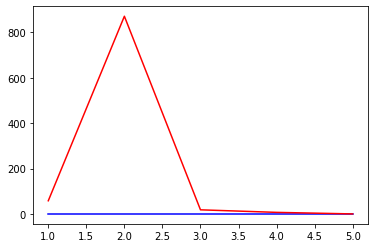

In [19]:
holder_m_mse_train = {}
holder_m_mse_test = {}
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error
for i in range(1, len(training_set_x)+1):
    if i == 1:
        reg_cv = Ridge(alpha=alpha).fit(training_set_x[:i,:].reshape(1, -1), training_set_y[:i])
        train_mse = mean_squared_error(training_set_y[:i].reshape(1, -1), reg_cv.predict(training_set_x[:i,:].reshape(1, -1)))
        test_mse = mean_squared_error(testing_set_y, reg_cv.predict(testing_set_x))

    else:
        reg_cv = Ridge(alpha=alpha).fit(training_set_x[:i,:], training_set_y[:i])
        train_mse = mean_squared_error(training_set_y[:i], reg_cv.predict(training_set_x[:i,:]))
        test_mse = mean_squared_error(testing_set_y, reg_cv.predict(testing_set_x))
        
    holder_m_mse_train[i] = train_mse
    holder_m_mse_test[i] = test_mse

lists_train = sorted(holder_m_mse_train.items()) # sorted by key, return a list of tuples
lists_test = sorted(holder_m_mse_test.items())

x_train, y_train = zip(*lists_train) # unpack a list of pairs into two tuples
x_test, y_test = zip(*lists_test)

plt.plot(x_train, y_train, color="blue")
plt.plot(x_test, y_test, color="red")
plt.show()

## How to do LassoCV Regression

LassoCV Regression works very similarly to RidgeCV Regression.
 - You give it a list of alphas and it picks the one that maximizes its cross validation criteria on the dataset given
 - Of course unlike Ridghe regression it forces features it has deemed unimportant to 0

In [20]:
from sklearn.linear_model import LassoCV
lasso_cv = LassoCV(alphas=[1e-3, 1e-2, 1e-1, 1]).fit(training_set_x, training_set_y)
lasso_cv.predict(testing_set_x)

array([93.70929912, 81.26263722])

You can get the selected aplha the same way as with Ridge Regression

In [21]:
alpha = lasso_cv.alpha_
alpha

0.1

With LassoCV or regular Lasso Regression it is possible to get the features that the algorithm has not set to 0.(Those are the selected features)<br>

### How to get features that Lasso Selected 
This can be done by getting the values that are not 0 from the coefficients/weights that Lasso provides

In [22]:
lasso_indices = np.nonzero(lasso_cv.coef_)
print(X_y_df.iloc[:, lasso_indices[0]].columns)
lasso_indices[0]

Index(['x2', 'x3', 'x4'], dtype='object')


array([1, 2, 3], dtype=int64)

## How to do regular Lasso Regression
Below I am showing you how to fit and predict with regular Lasso Regression. We will just use the selected alpha we got from LassoCV

In [23]:
from sklearn.linear_model import Lasso
lasso= Lasso(alpha=alpha).fit(training_set_x, training_set_y)
lasso.predict(testing_set_x)

array([93.70929912, 81.26263722])

# Classification

You will be using the ***Iris dataset*** from sklearn for all your classification tasks

Get the dataset with the following command

In [24]:
from sklearn.datasets import load_iris

iris_df =  load_iris(as_frame=True).frame
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


Your objectives are available in the README.md file accompanying this notebook:

I will be providing a jupyter file with headers for where you can insert your answers for each question

Below we will be going over the following to help you with the Lab:

- How to use MinMaxScaler for **feature scaling**
- How to use ***Chisquare*** for feature selection
- Notes about ***forward selection*** and ***backward selection*** for classification
- How to do ***cross validation*** with ***StratifiedShuffleSplit***
- How to do ***LogisticRegressionCV*** to find the best alpha for regularization on the dataset
  - How to grab the apha it selected
- How to get ***log_loss***


***Note:*** Remember to set 'penalty' to 'none' for the ***Multinomial Logistic Regression*** part of the lab and to 'l2' for the ***Regularized Logistic Regression*** part<br>
***Note:*** **Recursive feature elimination** works the same way for classification as regression so I will not be going over it again

## Below is our sample data for our demonstration.

In [25]:
X = np.array([[-1, -1, 1, 5, 7], [-2, -1, 0, 9, 8], [1, 1, 3, 6, 4], [2, 1, 3, 4, 6], [-2, -1, 0, 6, 8], [-2, -9, 0, 3, 7],[-2, -4, 0, 7, 7], [-5, -1, 0, 5, 8], [-2, -1, 0, 3, 7], [-2, -1, 7, 3, 7], [-4, -1, 5, 3, 9], [1, 2, 6, 7, 9]])
Y = np.array([0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1])
X_y_df = pd.DataFrame(np.array(np.transpose([X[:,0], X[:,1],X[:,2], X[:,3], X[:,4], Y])), columns=["x1", "x2", "x3", "x4", "x5", "y"])
X_y_df

,x1,x2,x3,x4,x5,y
0,-1,-1,1,5,7,0
1,-2,-1,0,9,8,0
2,1,1,3,6,4,1
3,2,1,3,4,6,1
4,-2,-1,0,6,8,0
5,-2,-9,0,3,7,1
6,-2,-4,0,7,7,1
7,-5,-1,0,5,8,1
8,-2,-1,0,3,7,0
9,-2,-1,7,3,7,0


## How to use MinMaxScaler for feature scaling

A few Notes:
- Feature scaling will likely not have a huge effect on the Iris datase but we are doing it because, if the dateset was much larger or complex, lbfgs might not converge and you would need to feature scale to help it converge. 
- We are using MinMaxScaler instead of StandardScaler for feature scaling because it gives the range [0,1] by default. When trying to feature select on chisquare, all your values must be positive so this feature scaling helps us acheive that

In [26]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
training_set_x = X[:10]
training_set_y = Y[:10]

testing_set_x = X[10:]
testing_set_y = Y[10:]

scaler.fit(training_set_x)
training_set_x_fs = scaler.transform(training_set_x)
testing_set_x_fs = scaler.transform(testing_set_x)

# Scaling full dataset of features(training and testing together)
all_scaled = scaler.transform(X)

## How to use Chisquare for feature selection

In [27]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

k_in=2
selector = SelectKBest(chi2, k=k_in).fit(training_set_x_fs, training_set_y)
training_set_x_fs_new = selector.transform(training_set_x_fs)
testing_set_x_fs_new = selector.transform(testing_set_x_fs)

***k***: This is the number of features to grab

#### How to show which features were selected

In [28]:
import numpy as np

selector.scores_
top_n = np.argsort(selector.scores_)[-k_in:]
print(X_y_df.iloc[:, top_n].columns)

Index(['x2', 'x5'], dtype='object')


## Notes about forward and backward selection for classification.

The only difference when using it for classification vs regression is the model we give it is of course LogisticRegression and the scoring is accuracy

In [29]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0, solver='lbfgs', penalty='l2')
sfs = SequentialFeatureSelector(clf, n_features_to_select="auto", scoring='accuracy', tol=0.01, direction='forward')
sfs.fit(training_set_x_fs, training_set_y)
training_set_x_new = sfs.transform(training_set_x_fs)
testing_set_x_new = sfs.transform(testing_set_x_fs)

## How to do cross validation with StratifiedShuffleSplit

We are Using StratifiedShuffle split because it is good practice to shuffle your data before creating your datasets and also we want to make sure we have a balace of classes in our train and test sets

We split the data into 4 training sets and 4 testing sets.<br>
The indices for the samples used for each dataset are printed below.<br>
In your objectives, you are asked to get the log loss and accuracy for every testing set.<br>

In [30]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=4, test_size=.25, random_state=0)

for train_index, test_index in sss.split(all_scaled, Y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = all_scaled[train_index], all_scaled[test_index]
    y_train, y_test = Y[train_index], Y[test_index]


TRAIN: [2 7 8 6 9 4 1 3 5] TEST: [11  0 10]
TRAIN: [ 8  1 11 10  4  3  6  7  0] TEST: [2 5 9]
TRAIN: [10  4  2  1  3  0  6  5 11] TEST: [9 8 7]
TRAIN: [ 7  5  8  4  1  2  9  3 10] TEST: [11  6  0]


## How to do LogisticRegressionCV to find the best alpha per class for regularization on the dataset

Note: Since our sample data is binary, it, only one alpha is returned. However on multiclass problems, then multiple alphas are returned; one for each class. These alphas gave us the best scores accross each class for the cross validation done internally

LogisticRegressionCV follows the same convention as the other scikitlearn classes

In [31]:
from sklearn.linear_model import LogisticRegressionCV
clf_cv = LogisticRegressionCV(Cs=[1e-3, 1e-2, 1e-1, 1], random_state=0, solver='lbfgs', penalty='l2').fit(training_set_x_fs, training_set_y)
alpha_per_class = clf_cv.C_
print(alpha_per_class)

[0.001]


Below is how you predict using LogisticRegressionCV

In [32]:
clf_cv.predict(testing_set_x_fs)

array([0, 0])

## How to get log loss

In [33]:
from sklearn.metrics import log_loss
log_loss_g = log_loss(testing_set_y, clf_cv.predict_proba(testing_set_x_fs))
log_loss_g

0.6931537256697817

Notice that we are giving it the probabilities of our predictions rather than the actual predictions using the function "predict_proba"

# Conclusion

- Did the features selected by r_regression and the correlation matrix match up and make sense to you?
- Did you notice that when using auto forward selection you ended up with less features than with backward     
  elimination?
- How different were the features you got accross different feature selection techniques
- When you used Cross validation with RidgeCV, LassoCV and LogisticRegressionCV, did you notice that one alpha was chosen for most of the created datasets. Did that alpha line up with the alpha selected when you didnt use Cross Validation?
- Did your learning curve look like the ones we discussed in class?

Note: These are not questions that need to be answered for marks. They are things I want you to keep in mind and reflect on